##### This Notebook is intended to test the metrics of our most recent model

In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# port to downloads file
os.chdir('C:\\Users\\steve\\Downloads')

In [15]:
# read metrics file, format: [val_loss,val_acc, train_loss, train_acc, test_loss, test_acc]
metrics_df = pd.read_csv('metrics0.csv', header=None)

# relabel headers
metrics_df.columns = ['val_loss', 'val_acc', 'train_loss', 'train_acc', 'test_loss', 'test_acc']
metrics_df.head()

,val_loss,val_acc,train_loss,train_acc,test_loss,test_acc
0,5.641333,0.650000,5.712752,0.645570,1.465282,0.909091
1,11.028171,0.315789,6.492011,0.597222,5.861125,0.636364
2,8.059048,0.500000,5.820423,0.638889,4.835429,0.700000
3,6.786567,0.578947,3.605364,0.776316,4.395844,0.727273
4,2.686349,0.833333,5.372699,0.666667,4.835429,0.700000


In [44]:
# aggregate so we have the averages of each batch
batch_mean_df = metrics_df.groupby(np.arange(len(metrics_df))//5).mean()
batch_mean_df.head()

,val_loss,val_acc,train_loss,train_acc,test_loss,test_acc
0,6.840294,0.575614,5.400650,0.664933,4.278622,0.734545
1,6.536783,0.594444,5.439097,0.662547,4.600984,0.714545
2,5.483923,0.659766,5.817977,0.639041,3.839037,0.761818
3,6.143728,0.618830,5.493414,0.659177,4.894040,0.696364
4,6.135245,0.619357,5.322259,0.669796,6.095570,0.621818


In [42]:
# get the final output (model at end)
batch_mean_df.iloc[-1,:]

val_loss      5.475440
val_acc       0.660292
train_loss    5.679693
train_acc     0.647620
test_loss     4.835428
test_acc      0.700000
Name: 29, dtype: float64

In [49]:
len(batch_mean_df[:30])

30

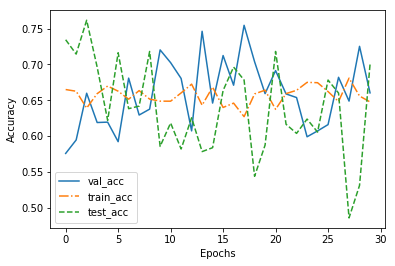

In [41]:
# plotting the accuracy
plt.plot(batch_mean_df.val_acc.values, label='val_acc', ls='-')
plt.plot(batch_mean_df.train_acc.values, label='train_acc', ls='-.')
plt.plot(batch_mean_df.test_acc.values, label='test_acc', ls='--')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy ')

plt.legend(loc='lower left')

plt.show()

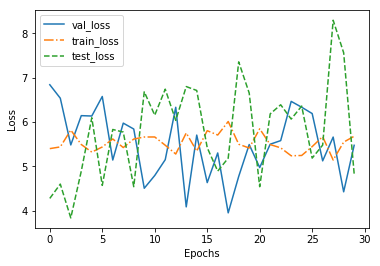

In [47]:
# plotting the loss
plt.plot(batch_mean_df.val_loss.values, label='val_loss', ls='-')
plt.plot(batch_mean_df.train_loss.values, label='train_loss', ls='-.')
plt.plot(batch_mean_df.test_loss.values, label='test_loss', ls='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(loc='upper left')

plt.show()